We will be predicting whether or not individuals have heart disease by analyzing multiple risk factors, and using a k nearest neighbors model. 

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

heart_disease= pd.read_csv('heart_disease_prediction.csv')
print("Number of observations:",heart_disease.shape[0])
print("Number of features: ",heart_disease.shape[1]-1)
heart_disease.head(5)

Number of observations: 918
Number of features:  11


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
heart_disease.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [3]:
heart_disease.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


We see that there are no null values in our dataset. However, it seems unlikely that Cholesterol and RestingBP can be 0. 

In [4]:
heart_disease.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

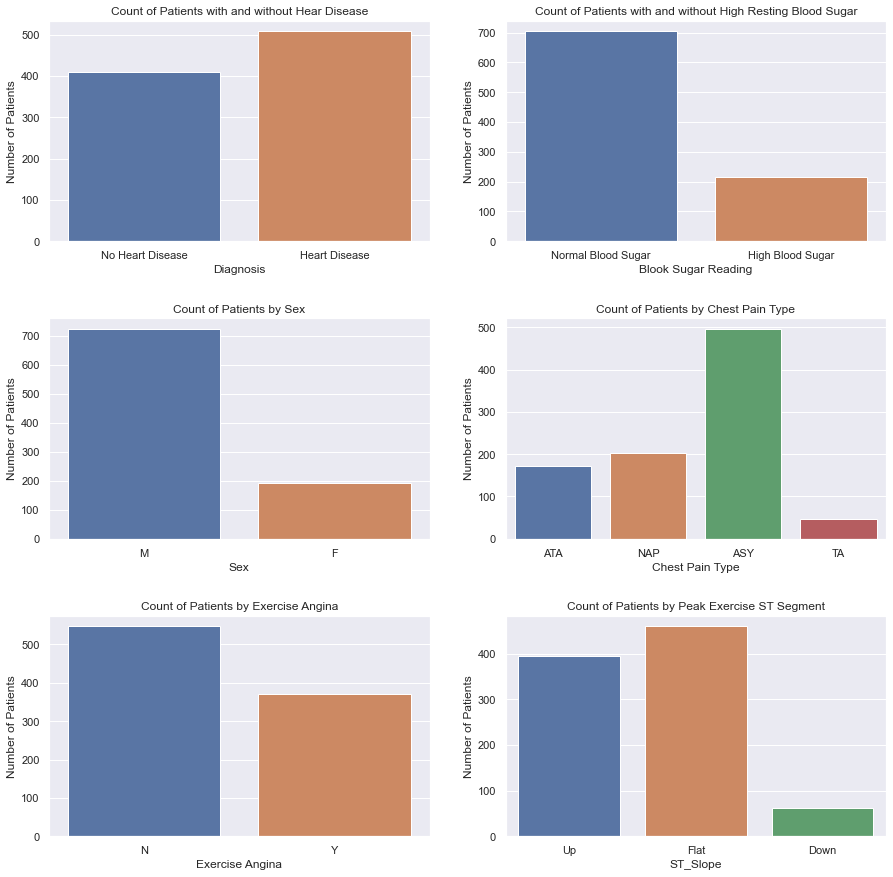

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme()

fig, axs = plt.subplots(3, 2, figsize= (15,15))
fig.subplots_adjust(hspace=.35)

sns.countplot(ax= axs[0,0], data= heart_disease, x= heart_disease["HeartDisease"])
axs[0,0].set_title("Count of Patients with and without Hear Disease")
axs[0,0].set_xlabel("Diagnosis")
axs[0,0].set_xticks([0,1],["No Heart Disease", "Heart Disease"])
axs[0,0].set_ylabel("Number of Patients")

sns.countplot(ax= axs[0,1], data= heart_disease, x= "FastingBS")
axs[0,1].set_title("Count of Patients with and without High Resting Blood Sugar")
axs[0,1].set_xlabel("Blook Sugar Reading")
axs[0,1].set_xticks([0,1],["Normal Blood Sugar", "High Blood Sugar"])
axs[0,1].set_ylabel("Number of Patients")

sns.countplot(ax= axs[1,0], data= heart_disease, x= "Sex")
axs[1,0].set_title("Count of Patients by Sex")
axs[1,0].set_xlabel("Sex")
axs[1,0].set_ylabel("Number of Patients")

sns.countplot(ax= axs[1,1], data= heart_disease, x= "ChestPainType")
axs[1,1].set_title("Count of Patients by Chest Pain Type")
axs[1,1].set_xlabel("Chest Pain Type")
axs[1,1].set_ylabel("Number of Patients")

sns.countplot(ax= axs[2,0], data= heart_disease, x= "ExerciseAngina")
axs[2,0].set_title("Count of Patients by Exercise Angina")
axs[2,0].set_xlabel("Exercise Angina")
axs[2,0].set_ylabel("Number of Patients")

sns.countplot(ax= axs[2,1], data= heart_disease, x= "ST_Slope")
axs[2,1].set_title("Count of Patients by Peak Exercise ST Segment")
axs[2,1].set_xlabel("ST_Slope")
axs[2,1].set_ylabel("Number of Patients")

plt.show()

Above are plots of the categorical data we have been given. 

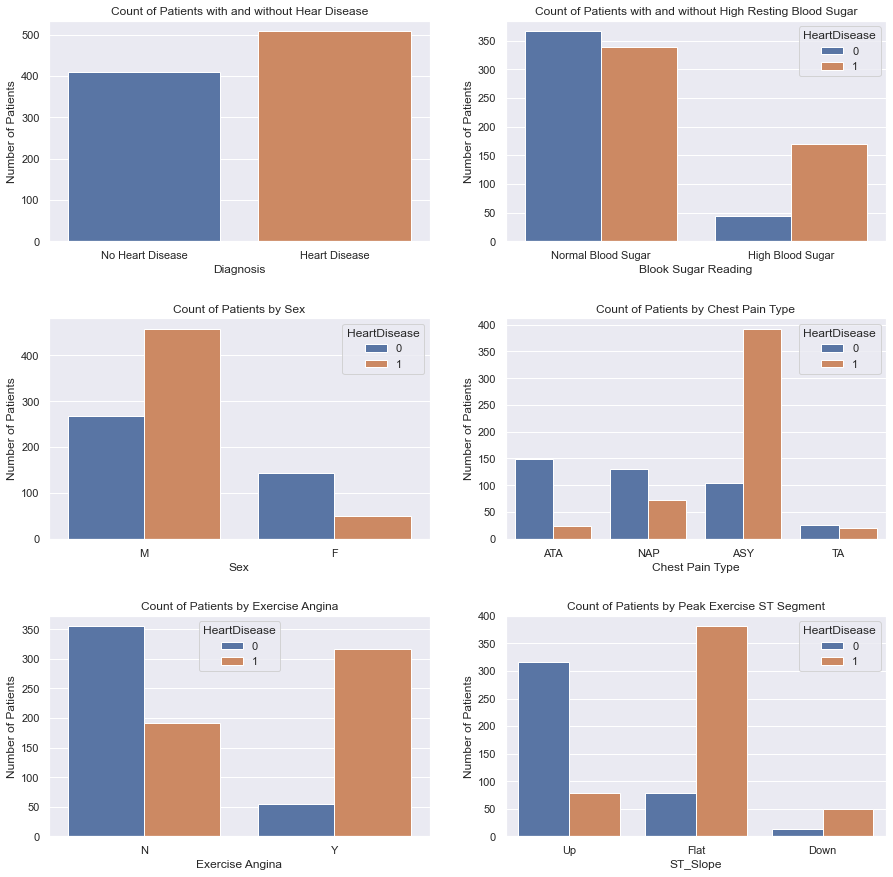

In [6]:
fig, axs = plt.subplots(3, 2, figsize= (15,15))
fig.subplots_adjust(hspace=.35)

sns.countplot(ax= axs[0,0], data= heart_disease, x= heart_disease["HeartDisease"])
axs[0,0].set_title("Count of Patients with and without Hear Disease")
axs[0,0].set_xlabel("Diagnosis")
axs[0,0].set_xticks([0,1],["No Heart Disease", "Heart Disease"])
axs[0,0].set_ylabel("Number of Patients")

sns.countplot(ax= axs[0,1], data= heart_disease, x= "FastingBS", hue= "HeartDisease")
axs[0,1].set_title("Count of Patients with and without High Resting Blood Sugar")
axs[0,1].set_xlabel("Blook Sugar Reading")
axs[0,1].set_xticks([0,1],["Normal Blood Sugar", "High Blood Sugar"])
axs[0,1].set_ylabel("Number of Patients")

sns.countplot(ax= axs[1,0], data= heart_disease, x= "Sex", hue= "HeartDisease")
axs[1,0].set_title("Count of Patients by Sex")
axs[1,0].set_xlabel("Sex")
axs[1,0].set_ylabel("Number of Patients")

sns.countplot(ax= axs[1,1], data= heart_disease, x= "ChestPainType", hue= "HeartDisease")
axs[1,1].set_title("Count of Patients by Chest Pain Type")
axs[1,1].set_xlabel("Chest Pain Type")
axs[1,1].set_ylabel("Number of Patients")

sns.countplot(ax= axs[2,0], data= heart_disease, x= "ExerciseAngina", hue= "HeartDisease")
axs[2,0].set_title("Count of Patients by Exercise Angina")
axs[2,0].set_xlabel("Exercise Angina")
axs[2,0].set_ylabel("Number of Patients")

sns.countplot(ax= axs[2,1], data= heart_disease, x= "ST_Slope", hue= "HeartDisease")
axs[2,1].set_title("Count of Patients by Peak Exercise ST Segment")
axs[2,1].set_xlabel("ST_Slope")
axs[2,1].set_ylabel("Number of Patients")

plt.show()

We have plotted the categorical data again above, but this time we have grouped each category by whether or not a person has heart disease.

In [7]:
print(heart_disease[heart_disease["RestingBP"]==0].shape[0])
print(heart_disease[heart_disease["RestingBP"]==0].index)

heart_disease.drop(heart_disease[heart_disease["RestingBP"]==0].index, inplace= True)

print(heart_disease[heart_disease["Cholesterol"]==0].shape[0])
print(heart_disease[heart_disease["Cholesterol"]==0].index)

heart_disease["Cholesterol"].replace({0: np.median(heart_disease["Cholesterol"])}, inplace= True)

1
Int64Index([449], dtype='int64')
171
Int64Index([293, 294, 295, 296, 297, 298, 299, 300, 301, 302,
            ...
            481, 483, 484, 492, 508, 514, 515, 518, 535, 536],
           dtype='int64', length=171)


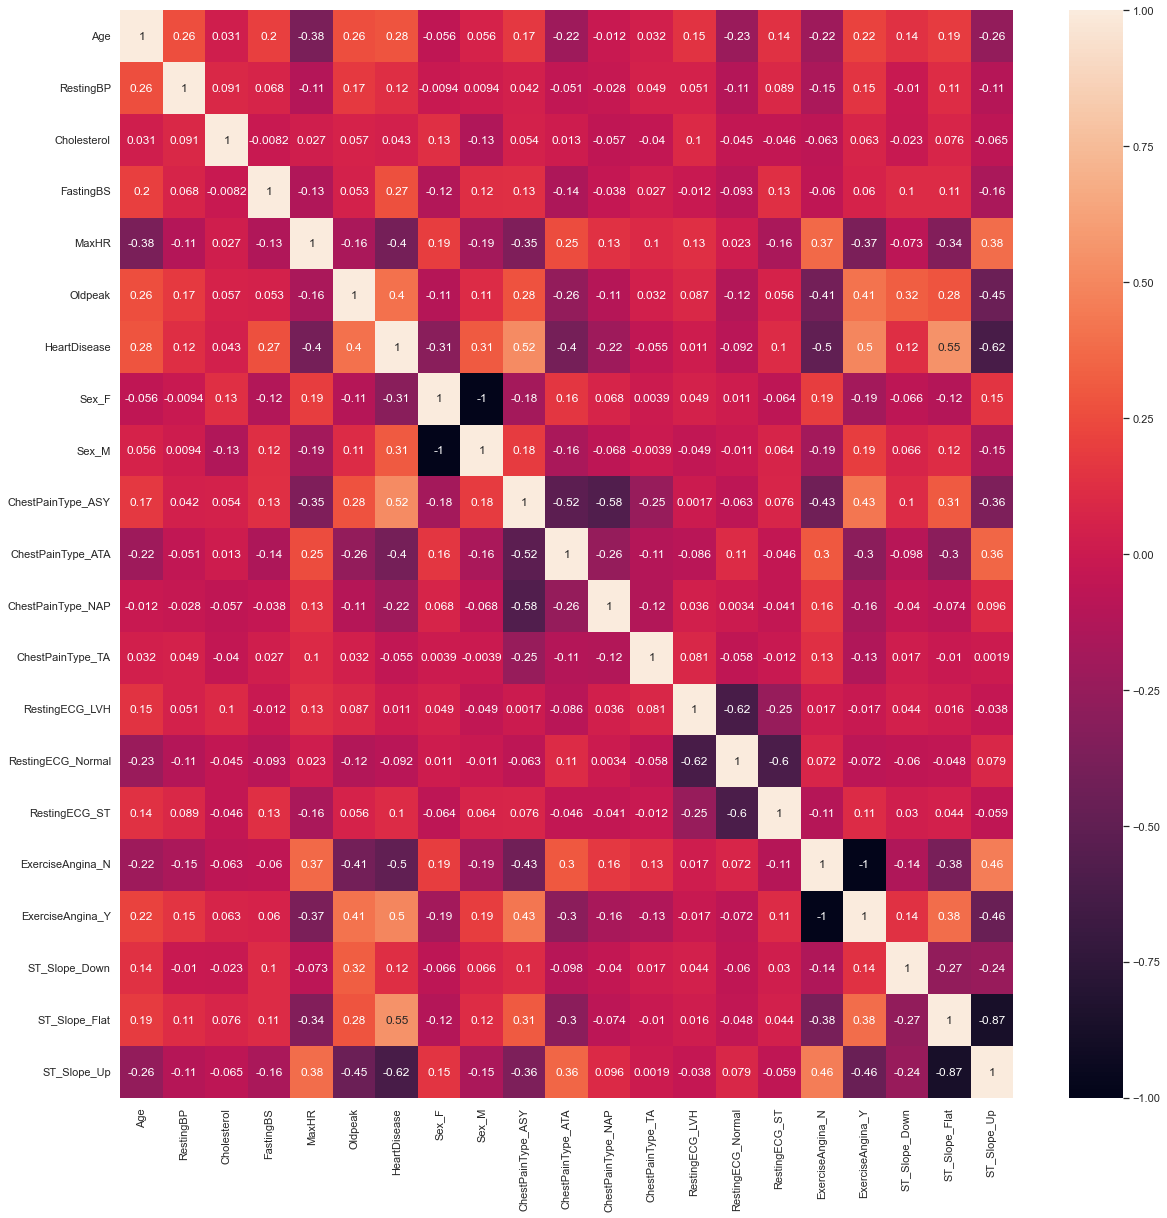

In [8]:
heart_disease= pd.get_dummies(data= heart_disease, columns= ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"])

fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(data= heart_disease.corr(), annot= True, ax=ax)
plt.show()

The above heatmap shows us that the variables that most strongly predict heart disease (.3 or higher correlation coefficient) are ST_Slope_Up, ST_Slope_Flat, ExerciseAngina_Y, Sex_M, and Oldpeak. Surprisingly, we see that there is not a strong correlation in our data between cholesterol and heart disease. 

In [9]:
X= heart_disease[["ST_Slope_Up", "ST_Slope_Flat", "ExerciseAngina_Y", "Sex_M", "Oldpeak"]].copy()
y= heart_disease["HeartDisease"].copy()

X_train, X_val, y_train, y_val= train_test_split(X, y, test_size= .2, random_state= 417)
features= ["ST_Slope_Up", "ST_Slope_Flat", "ExerciseAngina_Y", "Sex_M", "Oldpeak"]

for feature in features:
    knn= KNeighborsClassifier(n_neighbors= 300)
    knn.fit(np.array(X_train[feature]).reshape(-1, 1), y_train)
    print("The feature {} predicts heart disease with {}% accuracy on the validation set.".format(feature, knn.score(np.array(X_val[feature]).reshape(-1, 1), y_val)*100))

The feature ST_Slope_Up predicts heart disease with 80.97826086956522% accuracy on the validation set.
The feature ST_Slope_Flat predicts heart disease with 78.26086956521739% accuracy on the validation set.
The feature ExerciseAngina_Y predicts heart disease with 71.19565217391305% accuracy on the validation set.
The feature Sex_M predicts heart disease with 65.76086956521739% accuracy on the validation set.
The feature Oldpeak predicts heart disease with 72.28260869565217% accuracy on the validation set.


Above, we can see the accuracies of our model if it is only trained on unscaled single features.

In [10]:
scaler= MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_val_scaled= scaler.transform(X_val)

knn2= KNeighborsClassifier(n_neighbors= 300)
knn2.fit(X_train_scaled, y_train)
print("The accuracy of our model when using all parameters is {}.".format(knn2.score(X_val_scaled, y_val)))

The accuracy of our model when using all parameters is 0.8097826086956522.


We can now see that using all features in conjunction with one another led to a more accurate model than simply using one feature. 

In [11]:
knn3= KNeighborsClassifier()
grid_params = {"n_neighbors": range(1, 50),
                "metric": ["minkowski", "manhattan"],
                "p": range(1,10),
                "weights": ['uniform', 'distance']}
knn_grid= GridSearchCV(knn3, param_grid= grid_params, scoring= 'accuracy')
knn_grid.fit(X_train_scaled, y_train)
best_score= knn_grid.best_score_
best_params= knn_grid.best_params_
best_estimator= knn_grid.best_estimator_
accuracy= best_estimator.score(X_val_scaled, y_val)

print("The optimal parameters for our model are {} and their accuracy score is {}.".format(best_params, accuracy))

The optimal parameters for our model are {'metric': 'minkowski', 'n_neighbors': 38, 'p': 2, 'weights': 'uniform'} and their accuracy score is 0.842391304347826.


We have tested multiple parameters for out knn model using a grid search. Our optimized model only slightly outperforms our default model that we previously composed. 